# Useful utilities and functions for working with data

Before we get started on processes on threads, let's quickly review (or learn) some tools which we'll find useful.


We can use `timer()` to time our Python code, or ``%%time`` to time code in a cell. 

## Timing your code

In [6]:
import sys
sys.set_int_max_str_digits(1000000)

In [7]:
# the code below calculates how mnay digits there are in 100000! 
# Something for you to look up: what is the difference between time.process_time, and time.perf_counter?

from time import process_time as timer
start = timer()

x = 1 
for i in range (1, 100001):
    x= x * i
print (len(str(x)))

end = timer()

print("{:.3f}s".format(end-start))

456574
4.761s


In [8]:
%%time
# now use %%time in this cell to time the same code!

x = 1 
for i in range (1, 100001):
    x= x * i
print (len(str(x)))

456574
CPU times: user 4.9 s, sys: 55.2 ms, total: 4.96 s
Wall time: 5.13 s


What is the difference between `%%time and `%timeit`? 

In [9]:
def test_fact():
    x = 1 
    for i in range (1, 101):
        x= x * i
    #print (len(str(x)))

%timeit test_fact()

6.01 µs ± 138 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


You can also use [the Python profiler](https://docs.python.org/3.7/library/profile.html) to test your code.

In [10]:
def test_fact():
    x = 1 
    for i in range (1, 100001):
        x= x * i
    print (len(str(x)))
    
%prun test_fact()

456574
 

## Finding a bunch of filenames

The [`glob` library](https://docs.python.org/3/library/glob.html) is one of the most useful utility libraries in Python, as it lets you recursively search through a provided directory for matching folders.


In [11]:
import glob

files = glob.glob('*.*py*')

print (files)

['File Formats.ipynb', 'Concurrency and locks.ipynb', 'Multi-processing (Processes and Threads).ipynb']


## Measuring memory usage

`psutil` can be used to display the current memory usage of a process (There are differences in output between Mac/Linux and Windows due to underlying differences in the operating system).

In [12]:
# This may also return an  "Access denied" error on Windows depending on which account you run it in

import psutil
p = psutil.Process()
mi = p.memory_full_info()
print (mi.uss, "\n\n", mi)

65847296 

 pfullmem(rss=73138176, vms=35177992192, pfaults=32882, pageins=0, uss=65847296)


##  Memory Profiling

You may need to install `memory_profiler` using pip or conda, but you can use this package to collect data about how your code is performing at regular intervals

[127.25, 127.27734375, 127.27734375, 127.27734375, 127.27734375, 127.27734375, 127.27734375, 127.27734375, 127.27734375, 127.27734375, 127.27734375, 130.33203125, 134.91015625, 134.91015625, 134.91015625, 134.91015625, 134.91015625, 134.91015625, 134.91015625, 134.91015625, 134.91015625, 138.7265625, 138.53515625, 138.53515625, 138.53515625, 138.53515625, 138.53515625, 138.53515625, 138.53515625, 138.53515625, 138.53515625, 138.34375, 138.34375, 138.34375, 138.34375, 138.34375, 138.34375, 138.34375, 138.34375, 138.34375, 138.34375, 138.34765625]
Peak observed memory: 11.4765625


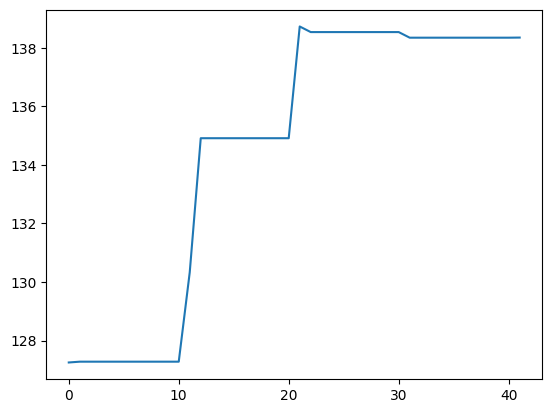

In [14]:
import time
import memory_profiler

def sleepy_func():
    time.sleep(1)
    x = [1] * 1_000_000
    time.sleep(1)
    x = [1] * 500_000
    time.sleep(1)
    x = []
    time.sleep(1)

mem = memory_profiler.memory_usage(proc=sleepy_func, interval = 0.1)
print (mem)
print ("Peak observed memory:", max(mem) - min(mem))

%matplotlib inline 
import matplotlib.pyplot as plt
plt.plot(mem)
plt.show()

# Concurrent programming with processes

Consider the functions below - we'll use them for the next couple of examples

In [15]:
import os

def func1():
    pid = os.getpid()  # get unique process ID
    ppid = os.getppid()  # get the process ID of the parent
    print ("func1 pid={:d} ppid={:d}".format(pid, ppid))
           
def func2():
    pid = os.getpid()  # get unique process ID
    ppid = os.getppid()  # get the process ID of the parent
    print ("func2 pid={:d} ppid={:d}".format(pid, ppid))

# run both methods sequentially
func1()
func2()

func1 pid=99415 ppid=30394
func2 pid=99415 ppid=30394


## Using `multiprocessing`

We can use the `multiprocessing` module to start each function in its own process

In [17]:
# if you're on Windows, wait! You'll notice func1 and func2 don't actually seem to produce output

from multiprocessing import Process

# These lines prepare a Process for each function, but doesn't start it

p1 = Process(target = func1)
p2 = Process(target = func2)

p1.start()
p2.start()

# We now have three processes: main, p1, and p2
print ("main pid ={:d} ppid={:d}".format(os.getpid(), os.getppid()))

# Wait for each process to finish
p1.join()
p2.join()

main pid =99415 ppid=30394


Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/local/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/usr/local/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
AttributeError: Can't get attribute 'func1' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/local/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 116, in spawn_main
    exitcode = _main(fd, parent_sentinel)
  File "/usr/local/Cellar/python@3.9/3.9.16/Frameworks/Python.framework/Versions/3.9/lib/python3.9/multiprocessing/spawn.py", line 126, in _main
    self = reduction.pickle.load(from_parent)
Attribut

### Windows and Jupyter

You'll notice that we didn't get the expected output, if you were on Windows
* Output from `print()` doesn't seem to show up (fix: export to file)
* Newly spawned processes can't execute functions defined in the same notebook
    * We'll write our functions to a different file (though we'll still see it in the same notebook)
    * use `%%file`

In [18]:
%%file funcs_12.py

import os

def func1():
    pid = os.getpid()
    ppid = os.getppid()
    str = "func1 pid={:d} ppid={:d}".format(pid, ppid)
    open("func1.txt", "w").write(str) # instead of print

def func2():
    pid = os.getpid()
    ppid = os.getppid()
    str = "func2 pid={:d} ppid={:d}".format(pid, ppid)
    open("func2.txt", "w").write(str)


Writing funcs_12.py


In [19]:
# We can try our code again, but we have to import func1 and func2

from multiprocessing import Process
from funcs_12 import func1, func2

# These lines prepare a Process for each function, but doesn't start it

p1 = Process(target = func1)
p2 = Process(target = func2)

p1.start()
p2.start()

# We now have three processes: main, p1, and p2
print ("main pid ={:d} ppid={:d}".format(os.getpid(), os.getppid()))

# Wait for each process to finish
p1.join()
p2.join()

# and print the output from func1.txt and funct2.txt
print(open("func1.txt").read(), open ("func2.txt").read(), sep="\n")

main pid =99415 ppid=30394
func1 pid=523 ppid=99415
func2 pid=524 ppid=99415


## Using `Threading`

Next, we'll investigate the differences between processes and threads. First, let's set up a couple of functions to play with.


In [20]:
%%file my_sums.py

sum1 = 0
sum2 = 0

def do_sum1(a):
    global sum1
    sum1 = 0
    for x in a:
        sum1 += x;

def do_sum2(a):
    global sum2
    sum2 = sum(a)


Writing my_sums.py


Note that if we use processes to run these methods, these methods cannot interact "as planned" since processes do not share anything (especially memory). The process running `do_sum1()` would not be able to share `sum1` even if it's defined as global with the process running `do_sum2()`, and the same holds true for `sum2`.

However, we can use threading instead.

In [21]:
from threading import Thread
import my_sums

evens = [i*2 for i in range(10)]
odds = [i*2+1 for i in range(10)]

p1 = Thread(target=my_sums.do_sum1,args=(evens,))
p2 = Thread(target=my_sums.do_sum2,args=(odds,))
p1.start()
p2.start()
p1.join()
p2.join()
total = my_sums.sum1 + my_sums.sum2

print("total =", total, "expected: ", sum(range(10 * 2)))


total = 190 expected:  190


Next, time the code below to investigate how using multithreading affects your runtime

In [22]:
%%time

import numpy as np
from threading import Thread

n = 320_000_000
evens = np.arange(0, n*2, 2)
odds = np.arange(1,n*2, 2)

def do_sum1(a):
    global sum1
    sum1 = np.sum(a)

def do_sum2(a):
    global sum2
    sum2 = np.sum(a)

do_sum1(evens)
do_sum2 (odds)

CPU times: user 2.48 s, sys: 4.72 s, total: 7.2 s
Wall time: 7.85 s


In [24]:
p1 = Thread(target=do_sum1,args=(evens,))
p2 = Thread(target=do_sum2,args=(odds,))
p1.start()
p2.start()
p1.join()
p2.join()


Exercise: try implementing this with processes and time it

## Thread pools

Next, we'll use `ThreadPool` to more economically execute our tasks. Try timing the block of code below.

How many threads did we spin off?

In [44]:
%%time

import multiprocessing, os
from multiprocessing.pool import ThreadPool
import pandas as pd

# We'll use this global to store results
results = []

def read_csv(path):
    results.append(pd.read_csv(path))
    
# remember that pandas can read file names directly from a URL as well
paths_fmt = "taxi-1mil-rows/taxi-1mil-{:03d}.csv"
paths = [paths_fmt.format(i) for i in range(30)]

pool = ThreadPool(processes=multiprocessing.cpu_count())
res = pool.map(read_csv,paths)

df = pd.concat(results)
print(df.shape)

(1000000, 18)
Wall time: 10.1 s


In [41]:
print(multiprocessing.cpu_count())

8


Now let's try this using processes.

In [42]:
%%file read_csv.py
import pandas as pd
def read_csv(path):
    return pd.read_csv(path)


Overwriting read_csv.py


In [45]:
%%time

import pandas as pd
import multiprocessing
from multiprocessing import Pool
from read_csv import read_csv

paths_fmt = "taxi-1mil-rows/taxi-1mil-{:03d}.csv"
paths = [paths_fmt.format(i) for i in range(30)]

pool = Pool(processes=multiprocessing.cpu_count())
dfs = pool.map(read_csv, paths)

df = pd.concat(dfs)
df.head()


Wall time: 18.7 s


,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2014-12-12 18:16:00,2014-12-12 18:35:00,3,4.03,-74.014050,40.711707,1,NaN,-73.995627,40.759462,CSH,16.0,1.0,0.5,0.0,0.0,17.5
1,VTS,2014-12-12 18:18:00,2014-12-12 18:36:00,1,4.10,-73.945877,40.780525,1,NaN,-73.972558,40.740458,CRD,15.0,1.0,0.5,4.0,0.0,20.5
2,VTS,2014-12-12 18:31:00,2014-12-12 18:35:00,1,0.96,-73.961450,40.796260,1,NaN,-73.955630,40.787760,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,VTS,2014-12-08 01:53:00,2014-12-08 01:55:00,5,0.76,-73.955280,40.768675,1,NaN,-73.948977,40.777362,CRD,4.5,0.5,0.5,1.0,0.0,6.5
4,VTS,2014-12-12 17:58:00,2014-12-12 18:34:00,1,11.19,-73.862690,40.768960,1,NaN,-73.745810,40.766700,CSH,35.0,1.0,0.5,0.0,0.0,36.5
